In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = r"wafer_fault.csv"
wafers = pd.read_csv(file_path)
print(wafers.shape)
wafers.head()

(100, 592)


,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [3]:
wafers.drop(columns = ["Unnamed: 0","Good/Bad"]).iloc[:100].to_csv("test.csv",index=False)

In [4]:
wafers.rename(columns = {"Unnamed: 0":"wafer"}, inplace=True)

In [5]:
wafers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 592 entries, wafer to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 462.6+ KB


In [6]:
wafers.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,99.000000,100.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,100.000000,100.000000,...,34.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3017.301212,2487.180300,2202.168281,1484.362181,1.180367,100.0,97.449088,0.122195,1.461516,0.000243,...,74.331709,0.499390,0.013615,0.003549,2.727297,0.023510,0.014875,0.004685,77.430241,-0.880000
std,71.819707,66.954212,30.350606,460.985871,0.349654,0.0,5.553324,0.002006,0.071300,0.010610,...,41.857728,0.003431,0.004344,0.000873,0.875848,0.011991,0.007557,0.002527,55.106166,0.477367
min,2825.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.027900,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2973.040000,2446.595000,2189.966700,1111.543600,0.837300,100.0,95.108900,0.120800,1.407375,-0.006925,...,47.356000,0.497300,0.011300,0.003075,2.270425,0.013400,0.009475,0.002700,33.787600,-1.000000
50%,3004.390000,2493.890000,2200.988900,1244.289900,1.156900,100.0,99.513300,0.122200,1.453700,0.001000,...,65.127550,0.499400,0.012750,0.003400,2.546400,0.021800,0.013900,0.003850,62.059500,-1.000000
75%,3070.385000,2527.525000,2213.211100,1963.801600,1.383000,100.0,101.457800,0.123400,1.507425,0.008125,...,99.419050,0.501525,0.014700,0.003825,2.953750,0.028025,0.019200,0.005900,104.303400,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,107.152200,0.126200,1.641100,0.025000,...,223.101800,0.508700,0.043700,0.008900,8.816000,0.054500,0.040100,0.015000,223.101800,1.000000


In [7]:
from sklearn.model_selection import train_test_split

wafers, wafers_test = train_test_split(wafers, test_size=20, random_state=42)

In [8]:
wafers.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,79.000000,80.000000,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,80.000000,80.000000,...,27.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,3019.048228,2494.058875,2202.758988,1519.467071,1.201382,100.0,96.881160,0.122158,1.460087,0.000946,...,63.785093,0.499493,0.013905,0.003591,2.785103,0.023543,0.014155,0.004439,72.116730,-0.850000
std,72.665372,68.166898,31.633772,471.962104,0.365870,0.0,5.520108,0.002062,0.072159,0.010865,...,30.722790,0.003683,0.004577,0.000908,0.923064,0.011668,0.007263,0.002324,50.770394,0.530106
min,2889.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.026500,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2975.425000,2452.517500,2189.966700,1111.543600,0.850075,100.0,93.547250,0.120800,1.409950,-0.005750,...,46.961400,0.497175,0.011500,0.003100,2.298350,0.013850,0.009000,0.002650,33.654025,-1.000000
50%,3004.390000,2502.445000,2200.955600,1308.647900,1.164250,100.0,99.217800,0.122150,1.451900,0.001500,...,54.476100,0.499450,0.012950,0.003400,2.577150,0.021800,0.013100,0.003800,59.082500,-1.000000
75%,3065.730000,2532.755000,2212.866700,1997.641600,1.383000,100.0,101.133300,0.123375,1.498675,0.009000,...,80.740300,0.501700,0.014950,0.003925,2.992300,0.028100,0.018400,0.005750,93.190025,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,103.091100,0.126200,1.641100,0.025000,...,151.193000,0.508700,0.043700,0.008900,8.816000,0.054500,0.033400,0.012000,223.101800,1.000000


In [10]:
wafers["Good/Bad"].value_counts()

Good/Bad
-1    74
 1     6
Name: count, dtype: int64

# Finding Missing Values

In [11]:
wafers["Good/Bad"].isna().sum()

np.int64(0)

In [12]:
wafers.isna().sum().sum()/(wafers.shape[0]*(wafers.shape[1]-1))

np.float64(0.038536379018612524)

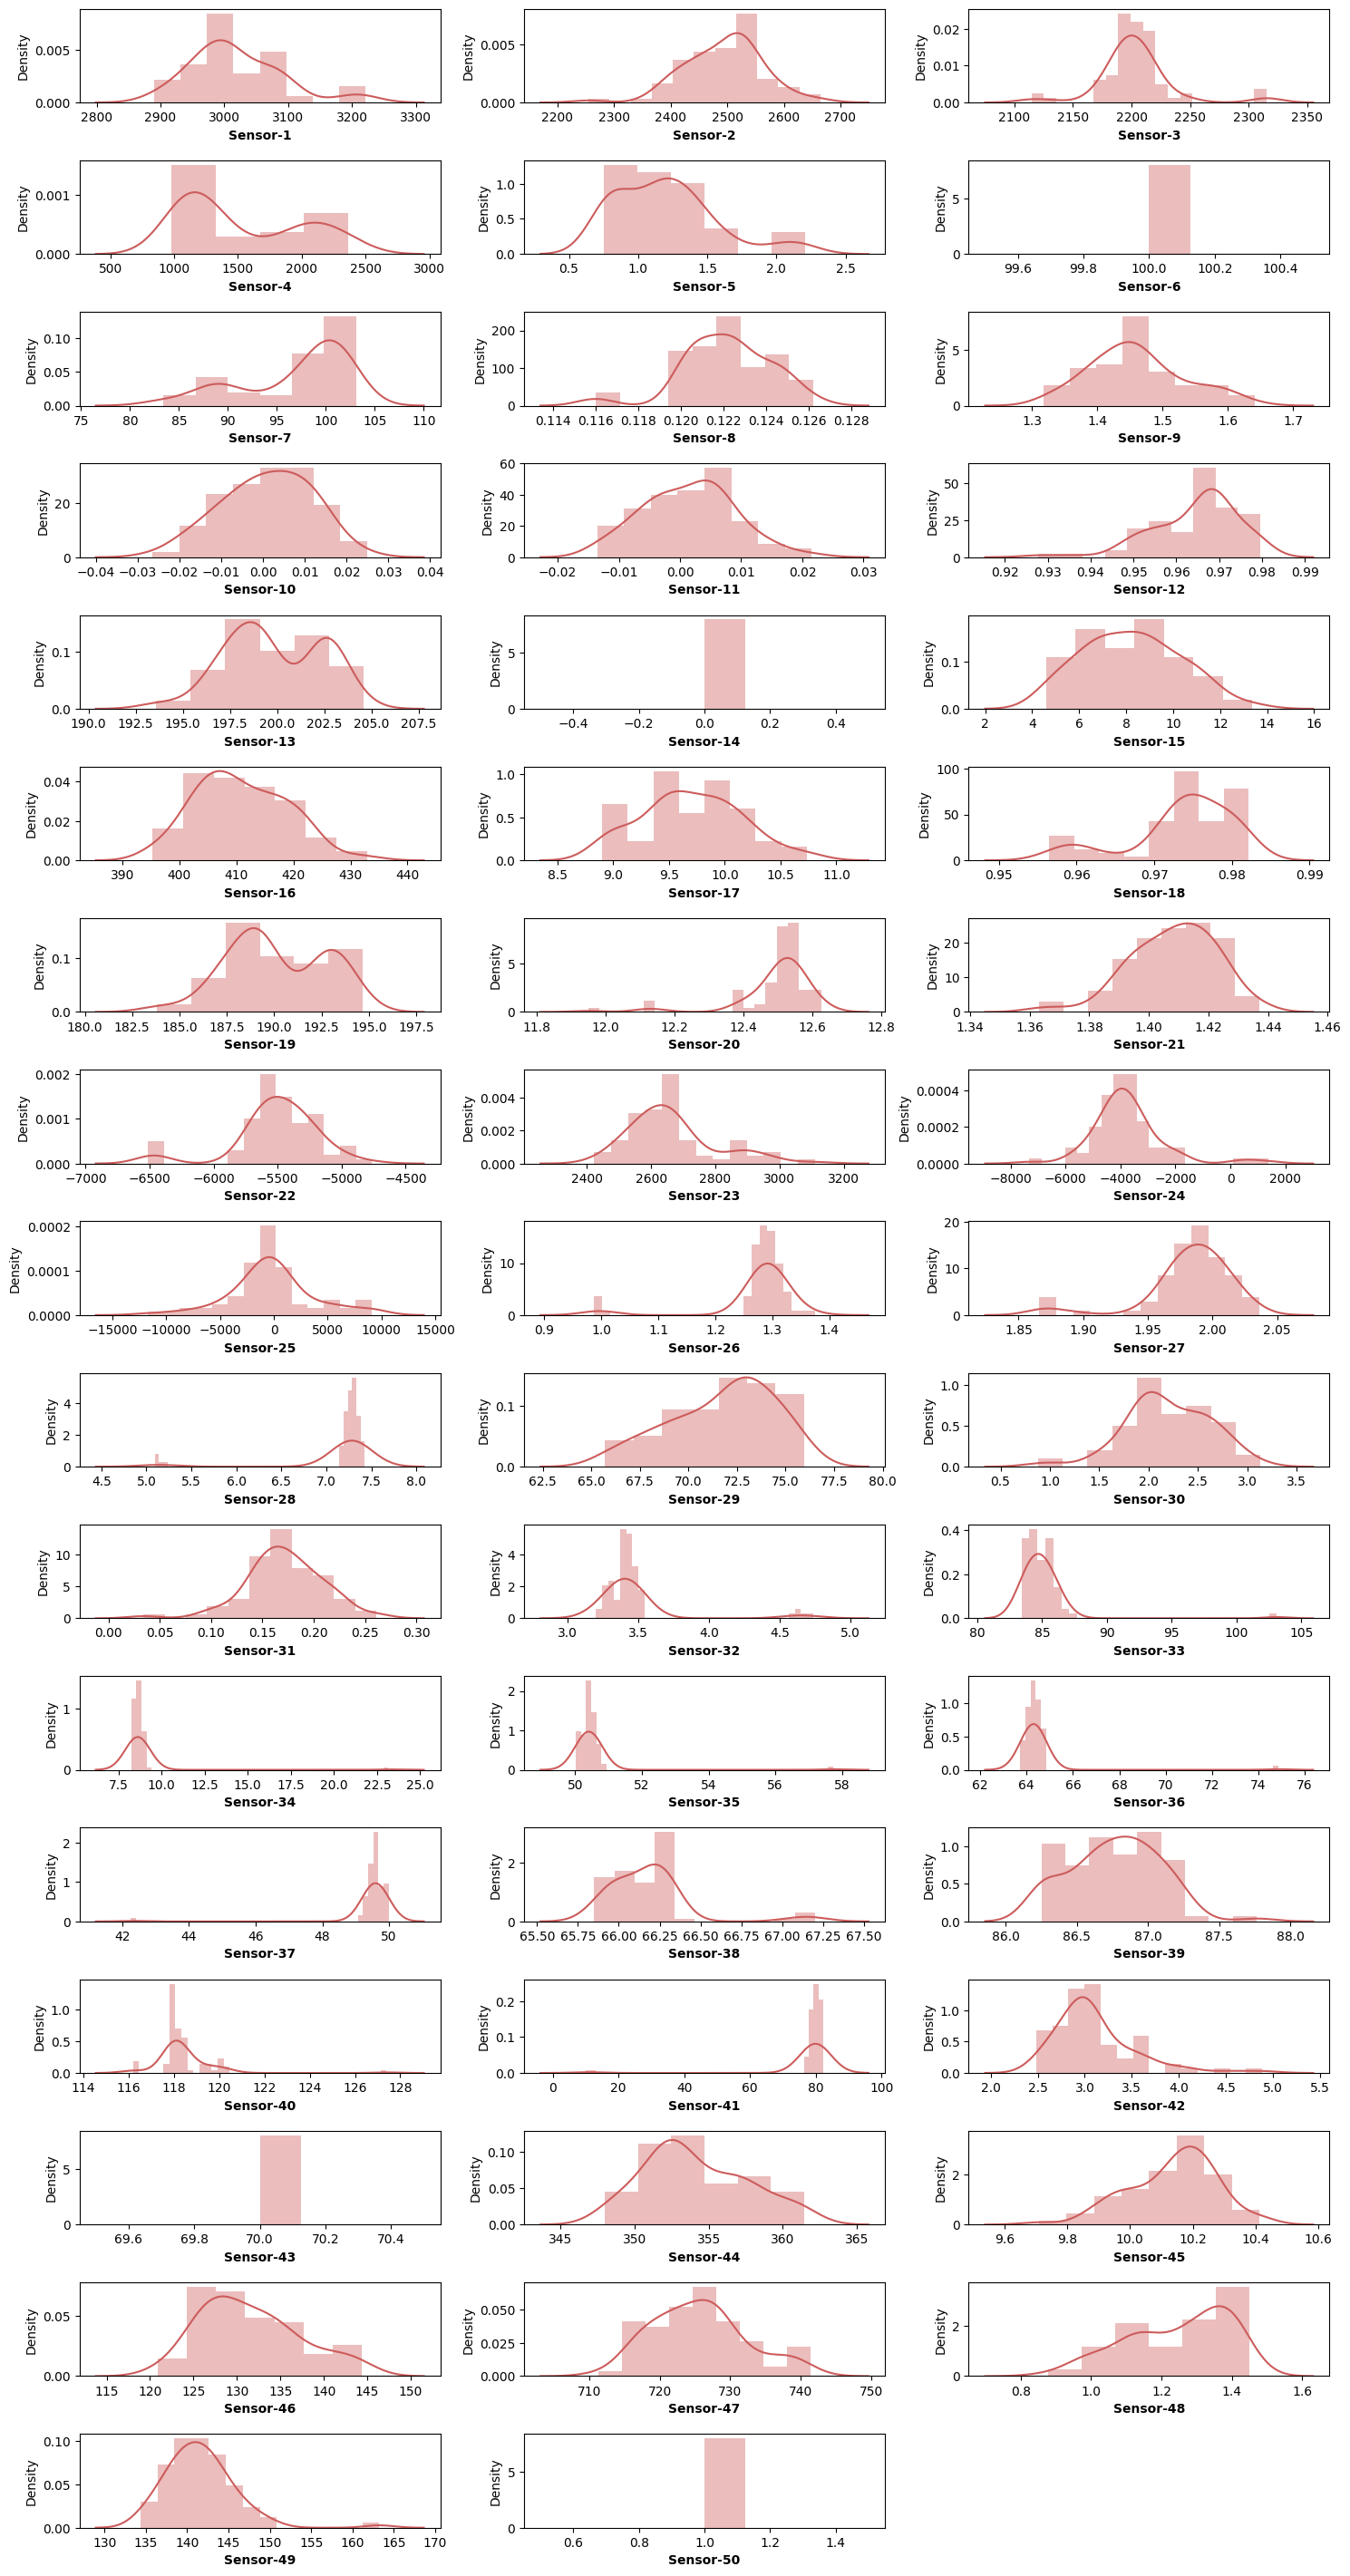

In [ ]:
plt.figure(figsize=(15, 100))  # One tall figure

for i, col in enumerate(wafers.columns[1:51]):
    plt.subplot(60, 3, i + 1)
    sns.distplot(x=wafers[col], color='indianred')
    plt.xlabel(col, weight='bold')

plt.tight_layout()
plt.show()

In [14]:
rand_50_sensors_idx = []
for i in range(50):
    if i not in rand_50_sensors_idx:
        rand_50_sensors_idx.append(np.random.randint(1,591))

In [15]:
# Cols to drop

def get_cols_with_0_std(df: pd.DataFrame):
    """
    Returns a list of columns which has zero standard deviation
    """
    
    cols_to_drop = []
    num_cols = [col for col in df.columns if df[col].dtype != 'O']
    for col in num_cols:
        if df[col].std() == 0:
            cols_to_drop.append(col)
    return cols_to_drop

def get_redundant_cols(df: pd.DataFrame, missing_thres=.5):
    """
    Return a list of columns having missing values more than certain threshold
    """
    cols_missing_ratio = df.isna().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratio[cols_missing_ratio > missing_thres].index)
    return cols_to_drop


In [16]:
cols_to_drop_1 = get_redundant_cols(wafers, missing_thres=.5)
cols_to_drop_1

['Sensor-73',
 'Sensor-74',
 'Sensor-158',
 'Sensor-159',
 'Sensor-293',
 'Sensor-294',
 'Sensor-346',
 'Sensor-347',
 'Sensor-579',
 'Sensor-580',
 'Sensor-581',
 'Sensor-582']

In [17]:
# Dropping the columns with 0 std deviation
cols_to_drop_2 = get_cols_with_0_std(df=wafers)
cols_to_drop_2.append("wafer")
cols_to_drop_2

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Se

In [18]:
# Cols to drop

cols_to_drop = cols_to_drop_2 + cols_to_drop_1

### Separate Features and Labels

In [19]:
X, y = wafers.drop(cols_to_drop, axis=1),wafers[["Good/Bad"]]

In [20]:
y.head

<bound method NDFrame.head of     Good/Bad
55        -1
88        -1
26        -1
42        -1
69        -1
..       ...
60        -1
71        -1
14        -1
92        -1
51        -1

[80 rows x 1 columns]>

### Data Transformation

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

imputer = KNNImputer(n_neighbors=3)
preprocessing_pipeline = Pipeline(
    steps=[('Imputer',imputer), ('Scaler', RobustScaler())]
)


In [22]:
preprocessing_pipeline

Pipeline(steps=[('Imputer', KNNImputer(n_neighbors=3)),
                ('Scaler', RobustScaler())])

In [23]:
X_trans = preprocessing_pipeline.fit_transform(X)
print(X_trans, X_trans.shape)

[[-0.02781221  0.37395233 -0.4289214  ...  0.          0.75955556
   0.        ]
 [ 2.50431022 -1.38644649 -0.47986463 ... -0.51612903 -0.52610857
   0.        ]
 [-0.60204699  0.28110298 -0.49685153 ...  0.58064516 -0.08775867
   0.        ]
 ...
 [-0.03223295  0.21779093  1.03590393 ...  0.12903226 -0.17805529
   0.        ]
 [ 0.03396281  0.87459106  0.53517467 ...  0.29032258  0.28421459
   0.        ]
 [ 0.86164048  0.3813055  -0.59146288 ... -0.16129032 -0.20782888
   0.        ]] (80, 457)


### Checking for Clusterning

In [24]:
!pip install knee

ERROR: Could not find a version that satisfies the requirement knee (from versions: none)
ERROR: No matching distribution found for knee

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from typing import Tuple
from dataclasses import dataclass

In [26]:
@dataclass
class ClusterDataInstances:
    X: np.array
    desc: str

    def get_ideal_number_of_clusters(self):
        try:
            print(f'Getting the ideal number of clusters to cluster "{self.desc} set" into.')
            print("Computing WCSS for shortlisted number of clusters.")

            wcss = []
            for i in range(1, 11):
                kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
                kmeans.fit(self.X)
                wcss.append(kmeans.inertia_)
                print(f"WCSS for n_clusters = {i}: {kmeans.inertia_}")

            print("WCSS computed successfully.")
            print("Finding the ideal number of clusters via Elbow method.")
            knee_finder = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
            print(f"Ideal number of clusters to be formed: {knee_finder.knee}")
            return knee_finder.knee

        except Exception as e:
            print(e)
            raise e

    def create_cluster(self) -> Tuple:
        try:
            ideal_clusters = self.get_ideal_number_of_clusters()
            print(f'Dividing the "{self.desc}" instance into {ideal_clusters} clusters via KMeans clustering.')
            kmeans = KMeans(n_clusters=ideal_clusters, init='k-means++', random_state=42)
            y_means = kmeans.fit_predict(self.X)
            print(f'Data instance divided into {ideal_clusters} clusters successfully!')
            return kmeans, np.c_[self.X, y_means]

        except Exception as e:
            print(e)
            raise e
        
        

In [27]:
cluster_wafers = ClusterDataInstances(X=X_trans, desc="wafer features")
clusterer, X_clus = cluster_wafers.create_cluster()
X_clus

Getting the ideal number of clusters to cluster "wafer features set" into.
Computing WCSS for shortlisted number of clusters.
WCSS for n_clusters = 1: 7156708.280931944
WCSS for n_clusters = 2: 2059868.9926299313
WCSS for n_clusters = 3: 1074794.2367120993
WCSS for n_clusters = 4: 530088.8871000747
WCSS for n_clusters = 5: 485242.64112738677
WCSS for n_clusters = 6: 436944.08080763393
WCSS for n_clusters = 7: 225948.38649946678
WCSS for n_clusters = 8: 189610.71263586
WCSS for n_clusters = 9: 146653.10827325043
WCSS for n_clusters = 10: 108297.4300358001
WCSS computed successfully.
Finding the ideal number of clusters via Elbow method.
Ideal number of clusters to be formed: 3
Dividing the "wafer features" instance into 3 clusters via KMeans clustering.
Data instance divided into 3 clusters successfully!


array([[-0.02781221,  0.37395233, -0.4289214 , ...,  0.75955556,
         0.        ,  1.        ],
       [ 2.50431022, -1.38644649, -0.47986463, ..., -0.52610857,
         0.        ,  1.        ],
       [-0.60204699,  0.28110298, -0.49685153, ..., -0.08775867,
         0.        ,  1.        ],
       ...,
       [-0.03223295,  0.21779093,  1.03590393, ..., -0.17805529,
         0.        ,  0.        ],
       [ 0.03396281,  0.87459106,  0.53517467, ...,  0.28421459,
         0.        ,  1.        ],
       [ 0.86164048,  0.3813055 , -0.59146288, ..., -0.20782888,
         0.        ,  1.        ]], shape=(80, 458))

In [28]:
np.unique(X_clus[:, -1])

array([0., 1., 2.])

In [29]:
# Configure clustered array along with target features
wafers_clus = np.c_[X_clus, y]

# Cluster_1 data
wafers_1 = wafers_clus[wafers_clus[:, -2]==0]
wafers_1.shape

(17, 459)

In [30]:
# Cluster_2 data
wafers_clus[wafers_clus[:,-2]==1].shape

(62, 459)

In [31]:
# Cluster_# data
wafers_clus[wafers_clus[:, -2]==2].shape

(1, 459)

### Resampling the Data

In [32]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from imblearn.combine import SMOTETomek

X, y = X_trans[:, :-1], y
resampler = SMOTETomek(sampling_strategy="auto")
X_res, y_res = resampler.fit_resample(X,y)

In [34]:
print("Shape of training instances before resampling",np.c_[X, y].shape)
print("Shape of training instances after resampling",np.c_[X_res, y_res].shape)

Shape of training instances before resampling (80, 457)
Shape of training instances after resampling (148, 457)


In [35]:
print(np.unique(y_res))
print(f"Value Counts: \n-1: {len(y_res[y_res==-1])},1: {len(y_res[y_res==1])}")

[-1  1]
Value Counts: 
-1: 148,1: 148


### Preparing the test Data

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state=42)

print(f"train set: {X_train.shape, y_train.shape}")
print(f"test set: {X_test.shape, y_test.shape}")

train set: ((103, 456), (103, 1))
test set: ((45, 456), (45, 1))


### Model Selection and Model Training

In [ ]:
# Preparing the training and test datasets

X_prep = X_train
y_prep = y_train
X_test_prep = X_test
y_test_prep = y_test

print(X_prep.shape, y_prep.shape)
print(X_test_prep.shape, y_test_prep.shape) 

(103, 456) (103, 1)
(45, 456) (45, 1)


In [45]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

svc_clf = SVC(kernel='linear')
svc_rbf_clf = SVC(kernel='rbf')
random_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(objective='binary:logistic')


In [ ]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

### Model  Evaluation

In [47]:
# SVC score
svc_score = cross_val_score(svc_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [48]:
display_scores(svc_score)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [49]:
svc_pred = cross_val_predict(svc_clf, X_test_prep, y_test_prep, cv=5)

#AUC score
svc_auc = roc_auc_score(y_test_prep, svc_pred)
svc_auc

np.float64(0.9565217391304348)

### Use Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression(random_state=42)

In [52]:
logistic_score = cross_val_score(logistic_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)
logistic_pred = cross_val_predict(logistic_clf, X_test_prep, y_test_prep, cv=5)
display_scores(logistic_score)
logistic_auc = roc_auc_score(y_test_prep, logistic_pred)

print(f"ROC AUC Score on Test Set: {logistic_auc}")

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0
ROC AUC Score on Test Set: 0.9565217391304348


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


In [53]:
logistic_auc

np.float64(0.9565217391304348)